# Ejercicio  1

Hernández Vela Daniel

In [1]:
using CSV
using DataFrames
using Statistics
using Plots
using StatsPlots

## Preparación de dataset

In [2]:
calcofi_bottle = CSV.read("../dat/bottle.csv", DataFrame)

In [4]:
calcofi_bottle

864863×74 DataFrame
    Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           De ⋯
        │ Int64    Int64    String15     String                             In ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │       1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
      2 │       1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      3 │       1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      4 │       1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      5 │       1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
      6 │       1        6  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      7 │       1        7  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      8 │       1        8  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
   ⋮    │    ⋮        ⋮          ⋮                       ⋮                     ⋱
 864857 │   34403   864857  093.3 120.0  20-1611SR-MX-313-2053-09331200-0…     ⋯
 864858 │   34403   864858  093.3 120.0  20-1611SR-MX-313-2053-09331200-0…
 864859 │   34404   864859  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864860 │   34404   864860  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864861 │   34404   864861  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…     ⋯
 864862 │   34404   864862  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864863 │   34404   864863  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
                                              70 columns and 864848 rows omitted

## EDA

### `dataShape`

In [5]:
function dataShape(df::DataFrame)
    shape = size(df)
    return "$(shape[1]) rows, $(shape[2]) columns"
end

dataShape (generic function with 1 method)

In [6]:
dataShape(calcofi_bottle)

"864863 rows, 74 columns"

### `dataType`

In [7]:
function dataType(df::DataFrame)
    for name in (names(df))
        println("Column: $name, Type: $(eltype(df[!, name]))")
    end
end

dataType (generic function with 1 method)

In [8]:
dataType(calcofi_bottle)

Column: Cst_Cnt, Type: Int64
Column: Btl_Cnt, Type: Int64
Column: Sta_ID, Type: String15
Column: Depth_ID, Type: String
Column: Depthm, Type: Int64
Column: T_degC, Type: Union{Missing, Float64}
Column: Salnty, Type: Union{Missing, Float64}
Column: O2ml_L, Type: Union{Missing, Float64}
Column: STheta, Type: Union{Missing, Float64}
Column: O2Sat, Type: Union{Missing, Float64}
Column: Oxy_µmol/Kg, Type: Union{Missing, Float64}
Column: BtlNum, Type: Union{Missing, Int64}
Column: RecInd, Type: Int64
Column: T_prec, Type: Union{Missing, Int64}
Column: T_qual, Type: Union{Missing, Int64}
Column: S_prec, Type: Union{Missing, Int64}
Column: S_qual, Type: Union{Missing, Int64}
Column: P_qual, Type: Union{Missing, Int64}
Column: O_qual, Type: Union{Missing, Int64}
Column: SThtaq, Type: Union{Missing, Int64}
Column: O2Satq, Type: Union{Missing, Int64}
Column: ChlorA, Type: Union{Missing, Float64}
Column: Chlqua, Type: Union{Missing, Int64}
Column: Phaeop, Type: Union{Missing, Float64}
Column: Phaq

### `countMissing`

In [9]:
function countColMissing(df::DataFrame, col::String)
    col in names(df) && return count(ismissing, df[! , col])
    error("Column not in dataframe")
end

countColMissing (generic function with 1 method)

In [10]:
function countMissing(df::DataFrame)
    for name in names(df)
        bad_cols = countColMissing(df, name)
        println("$bad_cols missing in column $name")
    end
end

countMissing (generic function with 1 method)

In [11]:
countMissing(calcofi_bottle)

0 missing in column Cst_Cnt
0 missing in column Btl_Cnt
0 missing in column Sta_ID
0 missing in column Depth_ID
0 missing in column Depthm
10963 missing in column T_degC
47354 missing in column Salnty
168662 missing in column O2ml_L
52689 missing in column STheta
203589 missing in column O2Sat
203595 missing in column Oxy_µmol/Kg
746196 missing in column BtlNum
0 missing in column RecInd
10963 missing in column T_prec
841736 missing in column T_qual
47354 missing in column S_prec
789949 missing in column S_qual
191108 missing in column P_qual
680187 missing in column O_qual
799040 missing in column SThtaq
647066 missing in column O2Satq
639591 missing in column ChlorA
225697 missing in column Chlqua
639592 missing in column Phaeop
225693 missing in column Phaqua
451546 missing in column PO4uM
413077 missing in column PO4q
510772 missing in column SiO3uM
353997 missing in column SiO3qu
527287 missing in column NO2uM
335389 missing in column NO2q
527460 missing in column NO3uM
334930 mis

### `dataMissingPercentage`

In [12]:
function colMissingPercentage(df::DataFrame, col::String)
    col in names(df) && return count(ismissing, df[! , col]) / nrow(df) * 100
    error("Column not in dataframe")
end

colMissingPercentage (generic function with 1 method)

In [13]:
function dataMissingPercentage(df::DataFrame)
    for name in names(df)
        bad_cols = colMissingPercentage(df, name)
        println("$bad_cols% missing in column $name")
    end
end

dataMissingPercentage (generic function with 1 method)

In [14]:
dataMissingPercentage(calcofi_bottle)

0.0% missing in column Cst_Cnt
0.0% missing in column Btl_Cnt
0.0% missing in column Sta_ID
0.0% missing in column Depth_ID
0.0% missing in column Depthm
1.2675996082616552% missing in column T_degC
5.475318056154559% missing in column Salnty
19.501585800294382% missing in column O2ml_L
6.092178761260454% missing in column STheta
23.54002888318728% missing in column O2Sat
23.54072263468318% missing in column Oxy_µmol/Kg
86.27909853930622% missing in column BtlNum
0.0% missing in column RecInd
1.2675996082616552% missing in column T_prec
97.32593485904704% missing in column T_qual
5.475318056154559% missing in column S_prec
91.33805007267047% missing in column S_qual
22.096910146462502% missing in column P_qual
78.64679145714408% missing in column O_qual
92.3891992142108% missing in column SThtaq
74.81716757451758% missing in column O2Satq
73.95286883587343% missing in column ChlorA
26.096271895086275% missing in column Chlqua
73.95298446112274% missing in column Phaeop
26.0958093940890

### `deleteColumns`

In [15]:
function deleteColumns(df::DataFrame, threshold::Number)
    return df[:, [col for col in names(df) if (colMissingPercentage(df, col) <= threshold)]]
end

deleteColumns (generic function with 1 method)

In [16]:
bottle_deleted_cols = deleteColumns(calcofi_bottle, 25)
dataShape(bottle_deleted_cols)

"864863 rows, 30 columns"

### `calculateCorrelation`

In [17]:
function calculateCorrelation(df::DataFrame)
    numeric_cols = [col for col in names(df) if eltype(df[!, col]) <: Number]
    numeric_data = Matrix(df[:, numeric_cols])
    correlation_matrix = cor(numeric_data)
    return correlation_matrix
end

calculateCorrelation (generic function with 1 method)

In [18]:
correlation_matrix = calculateCorrelation(calcofi_bottle)

6×6 Matrix{Float64}:
  1.0        0.999345  -0.162222   -0.100142   -0.16222    -0.161961
  0.999345   1.0       -0.161617   -0.100828   -0.161614   -0.161348
 -0.162222  -0.161617   1.0         0.0823158   1.0         0.999994
 -0.100142  -0.100828   0.0823158   1.0         0.0823171   0.0821835
 -0.16222   -0.161614   1.0         0.0823171   1.0         0.999994
 -0.161961  -0.161348   0.999994    0.0821835   0.999994    1.0

### `displayCorrelation`

In [19]:
function displayCorrelation(matrix::Matrix)
    heatmap(matrix, title="Correlation Matrix", size=(400, 400))
end

displayCorrelation (generic function with 1 method)

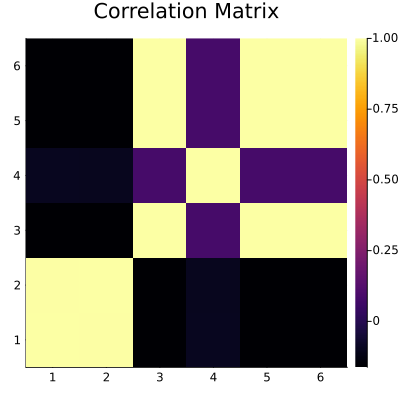

In [20]:
displayCorrelation(correlation_matrix)

### `removeOutliersIQR`

In [21]:
function removeOutliersIQR(df::DataFrame)
    numeric_cols = [col for col in names(df) if eltype(df[!, col]) <: Number]
    
    for col in numeric_cols
        Q1 = quantile(df[!, col], 0.25)
        Q3 = quantile(df[!, col], 0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[!, col] .>= lower_bound) .& (df[!, col] .<= upper_bound), :]
    end
    
    return df
end

removeOutliersIQR (generic function with 1 method)

In [22]:
bottle_IQR = removeOutliersIQR(calcofi_bottle)
dataShape(bottle_IQR)

"790980 rows, 74 columns"

### `deleteRow`

In [23]:
function deleteRow(df::DataFrame, col::String)
    df = df[.!ismissing.(df[!, col]), :]
    return df
end

deleteRow (generic function with 1 method)

In [24]:
bottle_filtered_rows = deleteRow(calcofi_bottle, "O2ml_L")
dataShape(bottle_filtered_rows)

"696201 rows, 74 columns"

### `filterColumnsByCorrelation`

In [38]:
function filterColumnsByCorrelation(df::DataFrame, target::String, threshold::Number, relation::Symbol)
    # Verificar que la columna objetivo sea numérica
    if !(eltype(df[!, target]) <: Number)
        error("La columna objetivo debe ser numérica")
    end
    
    # Calcular las correlaciones de las columnas numéricas con la columna objetivo
    numeric_cols = [col for col in names(df) if eltype(df[!, col]) <: Number]
    correlations = Dict{String, Number}()
    
    for col in numeric_cols
        if col != target
            correlations[col] = cor(df[!, target], df[!, col])
        end
    end
    
    # Filtrar las columnas según la relación y el umbral
    if relation == :greater
        cols_to_keep = [target; [col for col in keys(correlations) if correlations[col] > threshold]]
    elseif relation == :less
        cols_to_keep = [target; [col for col in keys(correlations) if correlations[col] < threshold]]
    else
        error("La relación debe ser :greater o :less")
    end
    
    return df[:, cols_to_keep]
end

filterColumnsByCorrelation (generic function with 1 method)

In [44]:
bottle_cor_filtered = filterColumnsByCorrelation(calcofi_bottle, "Depthm", 0.9, :less)
dataShape(bottle_cor_filtered)

"864863 rows, 4 columns"

In [45]:
bottle_cor_filtered

864863×4 DataFrame
    Row │ Depthm  Cst_Cnt  RecInd  Btl_Cnt 
        │ Int64   Int64    Int64   Int64   
────────┼──────────────────────────────────
      1 │      0        1       3        1
      2 │      8        1       3        2
      3 │     10        1       7        3
      4 │     19        1       3        4
      5 │     20        1       7        5
      6 │     30        1       7        6
      7 │     39        1       3        7
      8 │     50        1       7        8
   ⋮    │   ⋮        ⋮       ⋮        ⋮
 864857 │    500    34403       7   864857
 864858 │    521    34403       3   864858
 864859 │      0    34404       7   864859
 864860 │      2    34404       3   864860
 864861 │      5    34404       3   864861
 864862 │     10    34404       3   864862
 864863 │     15    34404       3   864863
                        864848 rows omitted

In [47]:
describe(calcofi_bottle)

74×7 DataFrame
 Row │ variable             mean      min                                media ⋯
     │ Symbol               Union…    Any                                Union ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Cst_Cnt              17138.8   1                                  16848 ⋯
   2 │ Btl_Cnt              432432.0  1                                  43243
   3 │ Sta_ID                         001.0 168.0                             
   4 │ Depth_ID                       19-4903CR-HY-060-0930-05400560-0…       
   5 │ Depthm               226.832   0                                  125.0 ⋯
   6 │ T_degC               10.7997   1.44                               10.06
   7 │ Salnty               33.8404   28.431                             33.86
   8 │ O2ml_L               3.39247   -0.01                              3.44
  ⋮  │          ⋮              ⋮                      ⋮                     ⋮  ⋱
  68 │ DIC1                 2153.24   1948.85                            2170. ⋯
  69 │ DIC2                 2168.15   1969.44                            2265.
  70 │ TA1                  2256.06   2181.57                            2244.
  71 │ TA2                  2278.86   2198.15                            2247.
  72 │ pH2                  7.94857   7.9231                             7.946 ⋯
  73 │ pH1                  7.91098   7.6183                             7.928
  74 │ DIC Quality Comment            Bottle tripped at correct depth         
                                                   4 columns and 59 rows omitted